In [11]:
## Install the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [12]:
df = pd.read_csv('/kaggle/input/bankloandataset/BankLoanDataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [15]:
df.shape

(614, 13)

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

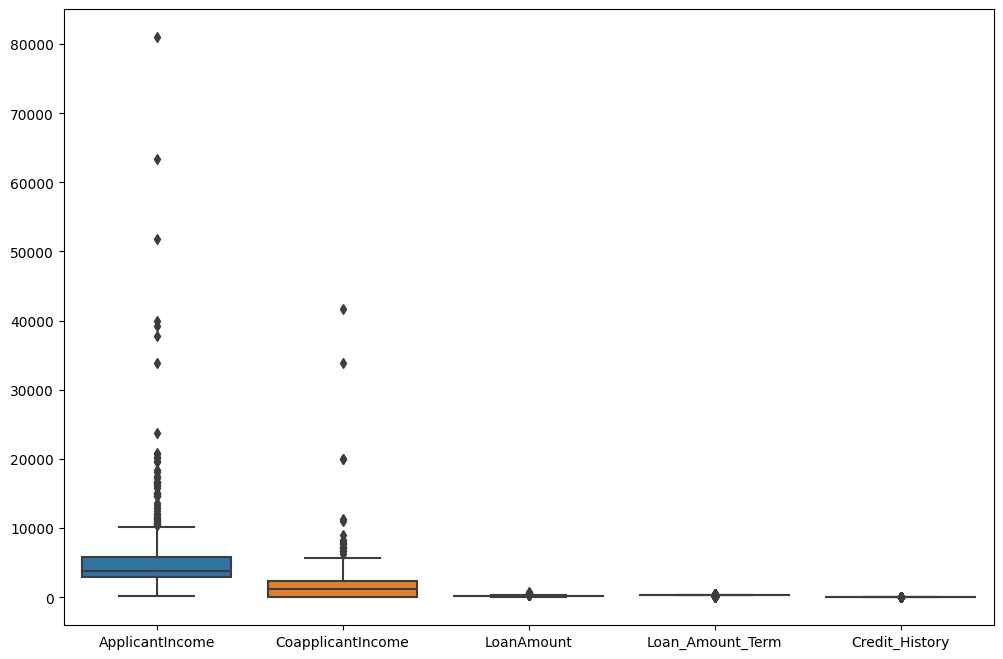

In [19]:
## Checking the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [20]:
## Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())



In [21]:
## Fill the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [22]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

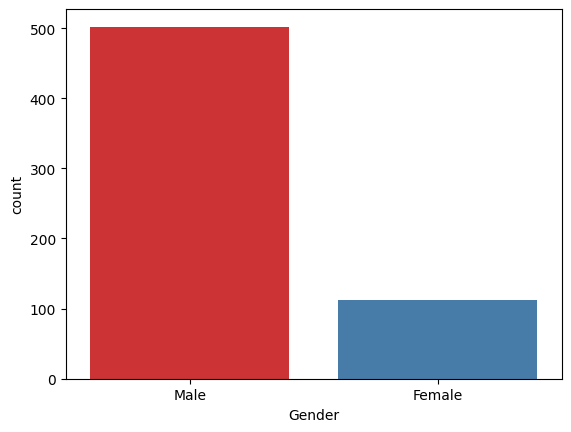

In [24]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

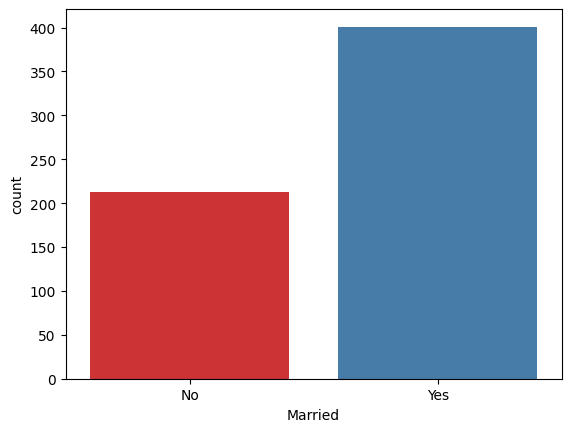

In [25]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set1')

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

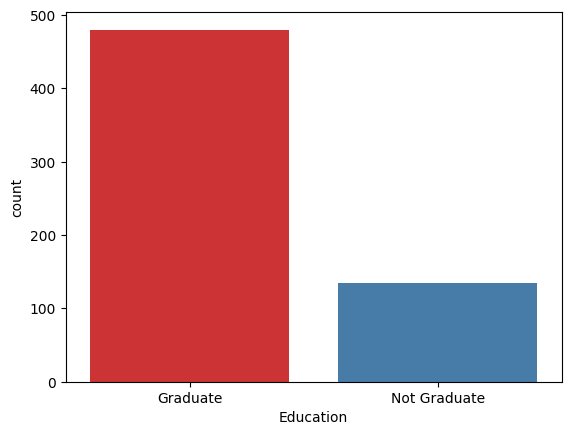

In [26]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')

In [27]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

ValueError: could not convert string to float: 'LP001002'

In [ ]:
corr = df.corr()
corr


In [ ]:
## Total Applicant Income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

In [ ]:
## Apply Log Transformation

df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'])

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

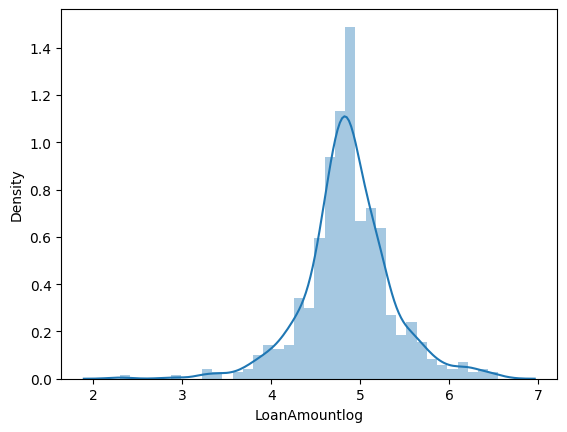

In [29]:

df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

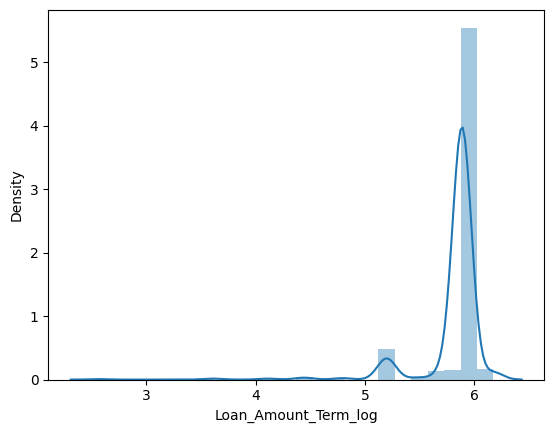

In [30]:

df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'])

In [31]:

df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'])

KeyError: 'Total_Income'

In [ ]:
df.head()

In [ ]:
## drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

In [ ]:
## Encoding Technique : Label Encoding, One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
## Split Independent and dependent features

X = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)


In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model1)

In [ ]:
accuracy*100

In [ ]:
## Accuracy : the ratio of the correctly predicted values to total values

In [32]:
score = cross_val_score(model1,X,y,cv=5)
score

NameError: name 'cross_val_score' is not defined

In [ ]:
np.mean(score)*100

In [33]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
score = cross_val_score(model2,X,y,cv=5)
print("Cross Validation score of Decision Tree: ",np.mean(score)*100)

In [ ]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

In [34]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

In [ ]:
df['Loan_Status'].value_counts()

In [ ]:
pip install -U imbalanced-learn

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

NameError: name 'X' is not defined

In [ ]:
X_resampled

In [ ]:
y_resampled

In [ ]:
y_resampled.value_counts()

In [ ]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

In [ ]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

.

In [ ]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

TEST

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
